In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("train.csv")
df = df.iloc[:, 1:] #dropping the id column it has nothing to do 

In [5]:
df.head(30)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [6]:
df_wo= pd.read_csv("data_without_outliers.csv")
home_ownership_status_distribution=(df_wo['loan_status']).value_counts()

In [7]:
df_wo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50295 entries, 0 to 50294
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          50295 non-null  int64  
 1   person_age                  50295 non-null  int64  
 2   person_income               50295 non-null  int64  
 3   person_home_ownership       50295 non-null  object 
 4   person_emp_length           50295 non-null  float64
 5   loan_intent                 50295 non-null  object 
 6   loan_grade                  50295 non-null  object 
 7   loan_amnt                   50295 non-null  int64  
 8   loan_int_rate               50295 non-null  float64
 9   loan_percent_income         50295 non-null  float64
 10  cb_person_default_on_file   50295 non-null  object 
 11  cb_person_cred_hist_length  50295 non-null  int64  
 12  loan_status                 50295 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
home_ownership_status_distribution=(df_wo['loan_status']).value_counts()
home_ownership_status_distribution

loan_status
0    50295
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
home_ownership_status_distribution=(df['person_home_ownership']).value_counts()
home_ownership_status_distribution

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [12]:
loan_accepted_by_home_ownership=df.groupby('person_home_ownership').agg(
    total_loans_applied=('loan_status', 'count'),  # Total loans per ownership category
    accepted_loans=('loan_status', 'sum') # Accepted loans per ownership category
)
loan_accepted_by_home_ownership['acceptance_percentage'] = (
    loan_accepted_by_home_ownership['accepted_loans'] / loan_accepted_by_home_ownership['total_loans_applied'] * 100
)
loan_accepted_by_home_ownership

,total_loans_applied,accepted_loans,acceptance_percentage
person_home_ownership,,,
MORTGAGE,24824,1483,5.974057
OTHER,89,15,16.853933
OWN,3138,43,1.370300
RENT,30594,6809,22.255998


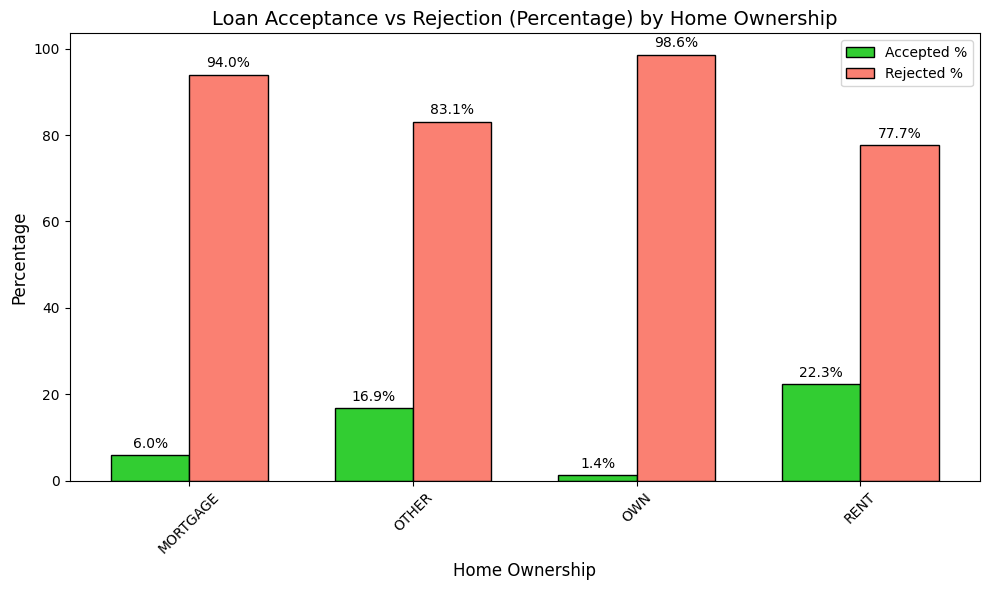

In [13]:
loan_accepted_by_home_ownership['accepted_percentage'] = (
    loan_accepted_by_home_ownership['accepted_loans'] / loan_accepted_by_home_ownership['total_loans_applied'] * 100
)
loan_accepted_by_home_ownership['rejected_percentage'] = 100 - loan_accepted_by_home_ownership['accepted_percentage']

# Positioning for side-by-side bars
categories = loan_accepted_by_home_ownership.index
x = np.arange(len(categories))  # Label positions
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting side-by-side bars
bar1 = ax.bar(x - width / 2, loan_accepted_by_home_ownership['accepted_percentage'], width, label='Accepted %', color='limegreen', edgecolor='black')
bar2 = ax.bar(x + width / 2, loan_accepted_by_home_ownership['rejected_percentage'], width, label='Rejected %', color='salmon', edgecolor='black')

# Adding percentage labels inside the bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Formatting
ax.set_xlabel('Home Ownership', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Loan Acceptance vs Rejection (Percentage) by Home Ownership', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [14]:
def plot_loan_acceptance_by_categorical_features(data, categorical_features, figsize=(20, 12)):
    """
    Create side-by-side bar charts for loan acceptance vs rejection percentages 
    for multiple categorical features in one figure.

    Args:
        data: DataFrame containing loan data.
        categorical_features: List of categorical features to plot.
        figsize: Tuple specifying the figure size.

    Returns:
        None. Displays the plots.
    """
    # Set up the figure and axes
    n_features = len(categorical_features)
    n_cols = 2  # Number of columns
    n_rows = (n_features + 1) // n_cols  # Number of rows needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        # Calculate accepted and rejected percentages
        summary = data.groupby(feature).agg(
            accepted_loans=('loan_status', lambda x: (x == 1).sum()),
            total_loans_applied=('loan_status', 'size')
        )
        summary['accepted_percentage'] = (
            summary['accepted_loans'] / summary['total_loans_applied'] * 100
        )
        summary['rejected_percentage'] = 100 - summary['accepted_percentage']

        # Positioning for side-by-side bars
        categories = summary.index
        x = np.arange(len(categories))  # Label positions
        width = 0.35  # Width of bars

        # Current axis
        ax = axes[i]

        # Plotting side-by-side bars
        bar1 = ax.bar(
            x - width / 2,
            summary['accepted_percentage'],
            width,
            label='Accepted %',
            color='limegreen',
            edgecolor='black'
        )
        bar2 = ax.bar(
            x + width / 2,
            summary['rejected_percentage'],
            width,
            label='Rejected %',
            color='salmon',
            edgecolor='black'
        )

        # Adding percentage labels inside the bars
        for bar in bar1:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, color='black')

        for bar in bar2:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, color='black')

        # Formatting
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Percentage', fontsize=10)
        ax.set_title(f'Loan Acceptance vs Rejection by {feature}', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45)
        ax.legend(fontsize=9)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    fig.tight_layout()

    # Display the plots
    plt.show()


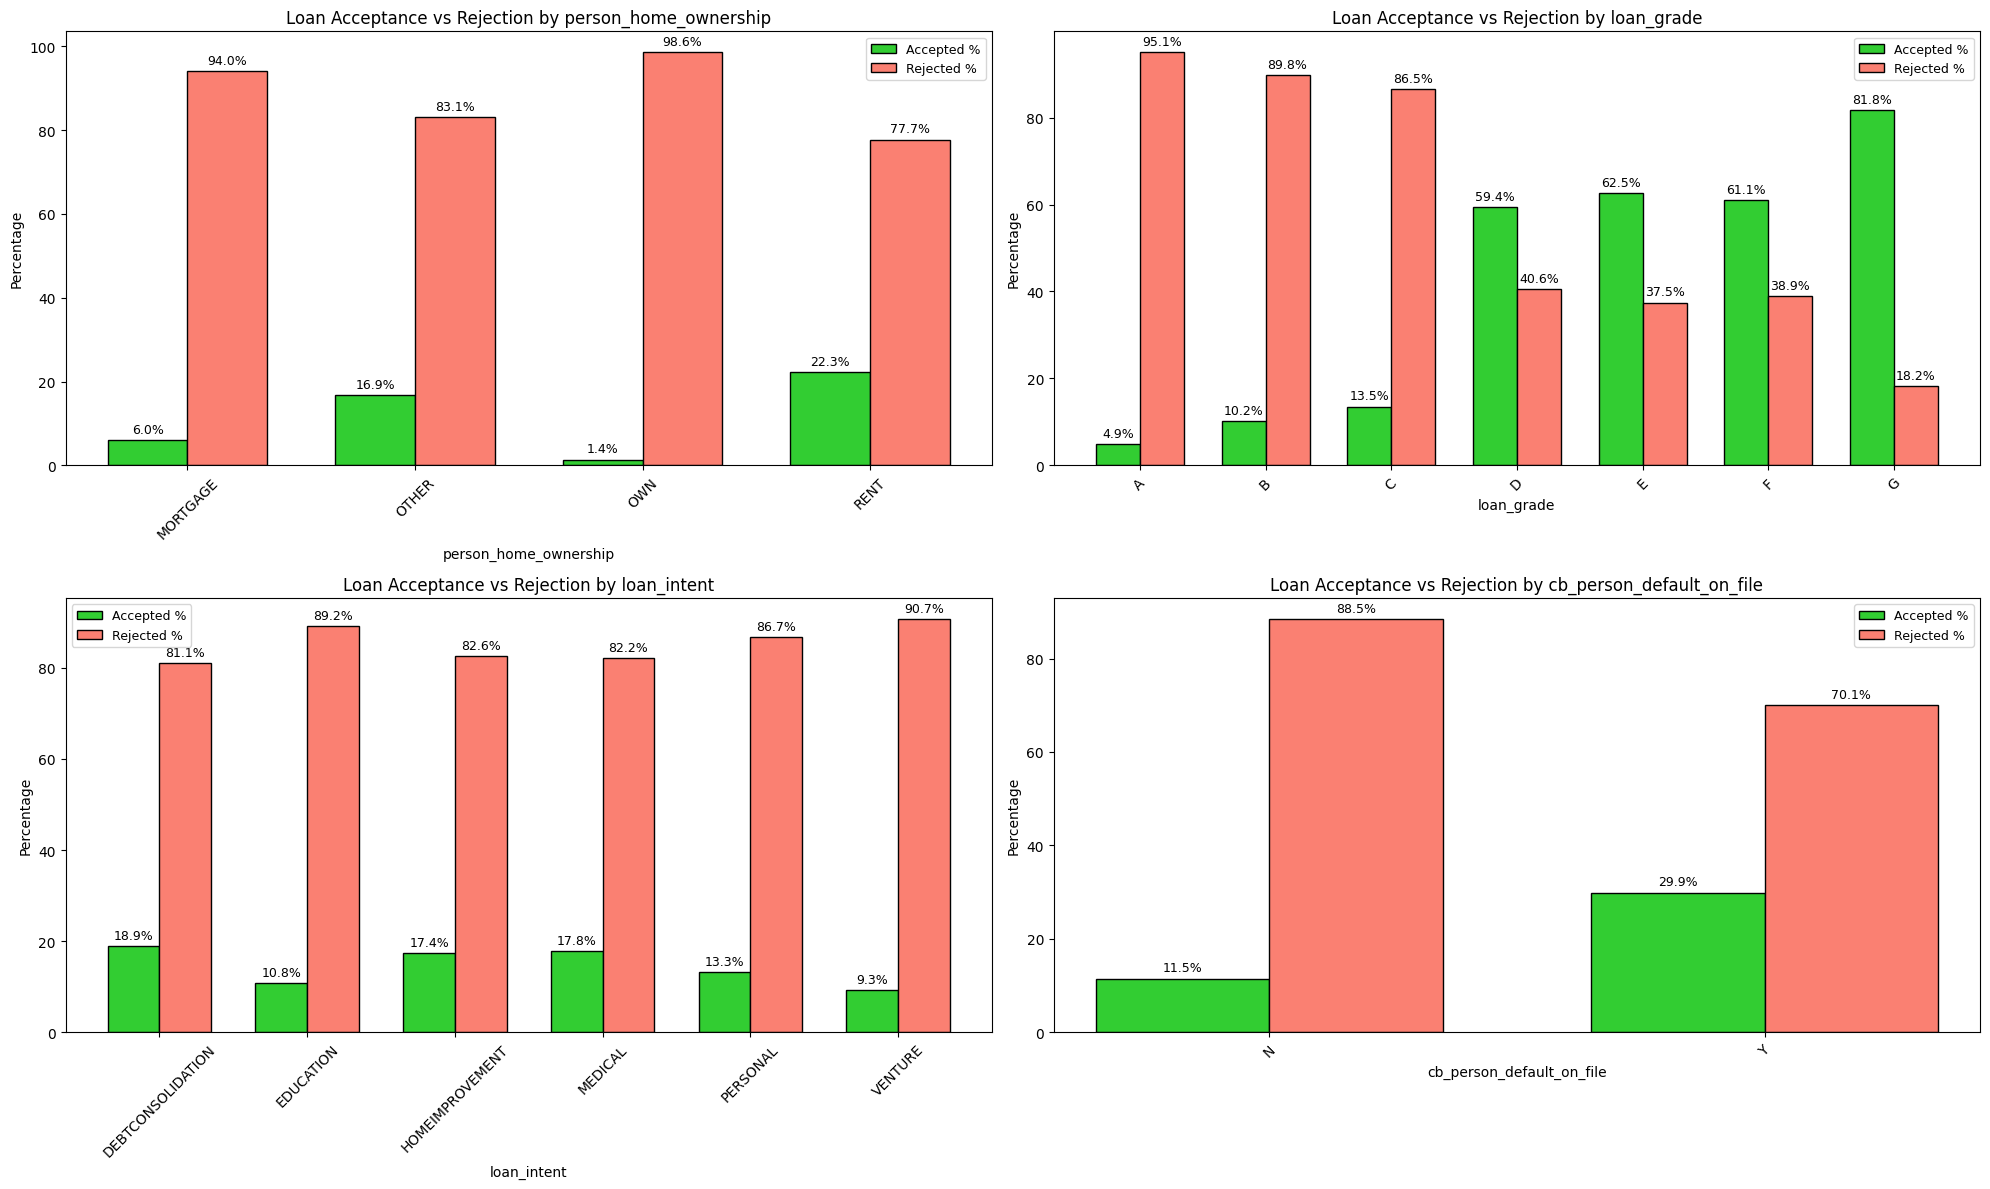

In [16]:
categorical_features = ['person_home_ownership', 'loan_grade', 'loan_intent', 'cb_person_default_on_file']
plot_loan_acceptance_by_categorical_features(data=df, categorical_features=categorical_features)


In [9]:
default_status_distribution=(df['cb_person_default_on_file']).value_counts()
default_status_distribution

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [10]:
loan_accepted_by_default_status= df.groupby('cb_person_default_on_file').agg(
    total_loans_applied=('loan_status', 'count'),  # Total loans per  category
    accepted_loans=('loan_status', 'sum') # Accepted loans per category
)
loan_accepted_by_default_status['acceptance_percentage'] = (
    loan_accepted_by_default_status['accepted_loans'] / loan_accepted_by_default_status['total_loans_applied'] * 100
)
loan_accepted_by_default_status

,total_loans_applied,accepted_loans,acceptance_percentage
cb_person_default_on_file,,,
N,49943,5749,11.511123
Y,8702,2601,29.889681


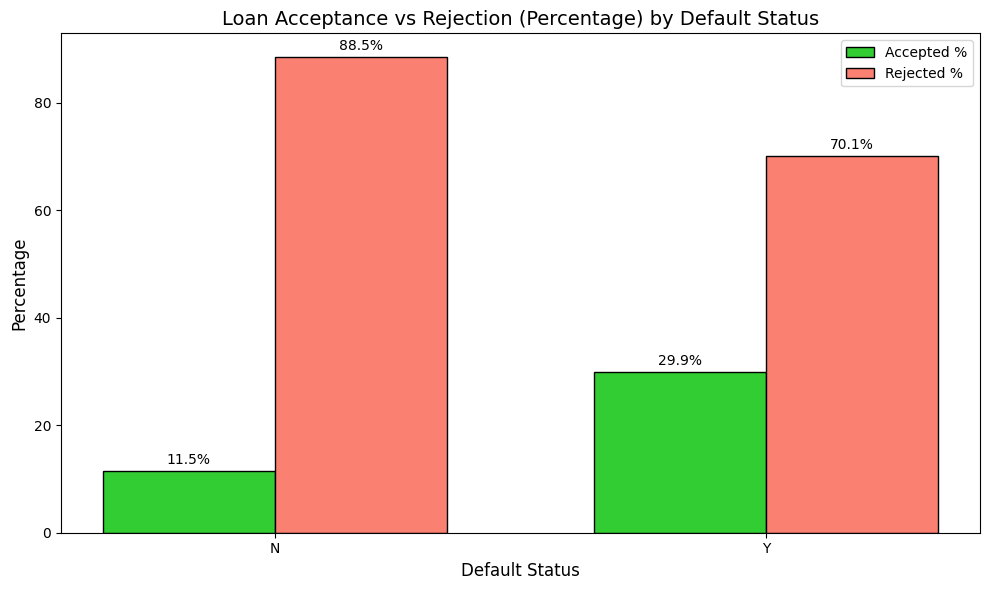

In [11]:
loan_accepted_by_default_status['accepted_percentage'] = (
    loan_accepted_by_default_status['accepted_loans'] / loan_accepted_by_default_status['total_loans_applied'] * 100
)
loan_accepted_by_default_status['rejected_percentage'] = 100 - loan_accepted_by_default_status['accepted_percentage']

# Positioning for side-by-side bars
categories = loan_accepted_by_default_status.index
x = np.arange(len(categories))  # Label positions
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting side-by-side bars
bar1 = ax.bar(x - width / 2, loan_accepted_by_default_status['accepted_percentage'], width, label='Accepted %', color='limegreen', edgecolor='black')
bar2 = ax.bar(x + width / 2, loan_accepted_by_default_status['rejected_percentage'], width, label='Rejected %', color='salmon', edgecolor='black')

# Adding percentage labels inside the bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Formatting
ax.set_xlabel('Default Status', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Loan Acceptance vs Rejection (Percentage) by Default Status', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=360)
ax.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [12]:
loan_intent_distribution = df['loan_intent'].value_counts()
loan_intent_distribution

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [13]:
loan_accepted_by_intent= df.groupby('loan_intent').agg(
    total_loans_applied=('loan_status', 'count'),  # Total loans per  category
    accepted_loans=('loan_status', 'sum') # Accepted loans per category
)
loan_accepted_by_intent['acceptance_percentage'] = (
    loan_accepted_by_intent['accepted_loans'] / loan_accepted_by_intent['total_loans_applied'] * 100
)
loan_accepted_by_intent

,total_loans_applied,accepted_loans,acceptance_percentage
loan_intent,,,
DEBTCONSOLIDATION,9133,1729,18.931348
EDUCATION,12271,1322,10.773368
HOMEIMPROVEMENT,6280,1091,17.372611
MEDICAL,10934,1949,17.825133
PERSONAL,10016,1330,13.278754
VENTURE,10011,929,9.279792


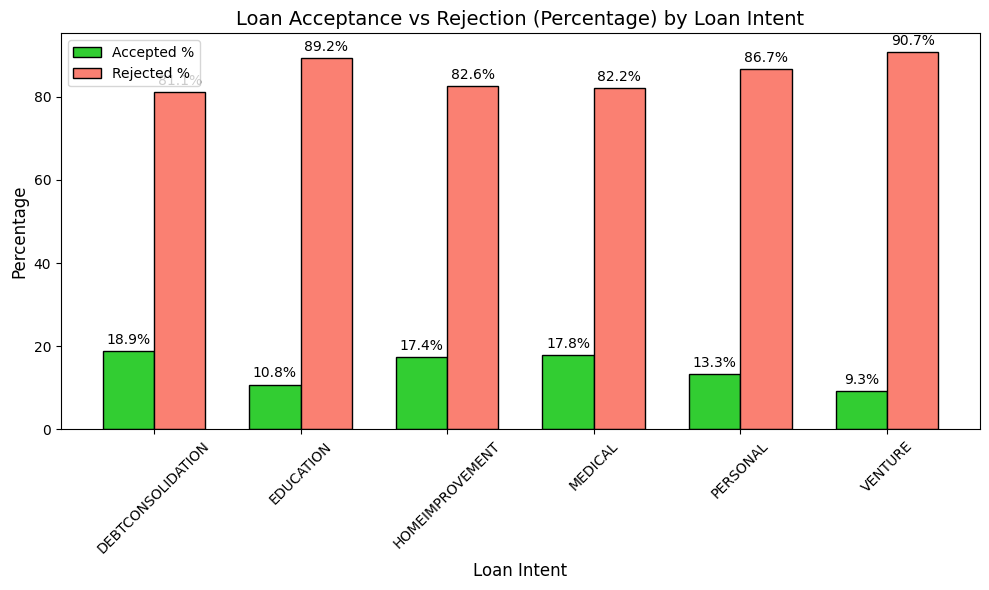

In [14]:
loan_accepted_by_intent['accepted_percentage'] = (
    loan_accepted_by_intent['accepted_loans'] / loan_accepted_by_intent['total_loans_applied'] * 100
)
loan_accepted_by_intent['rejected_percentage'] = 100 - loan_accepted_by_intent['accepted_percentage']

# Positioning for side-by-side bars
categories = loan_accepted_by_intent.index
x = np.arange(len(categories))  # Label positions
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting side-by-side bars
bar1 = ax.bar(x - width / 2, loan_accepted_by_intent['accepted_percentage'], width, label='Accepted %', color='limegreen', edgecolor='black')
bar2 = ax.bar(x + width / 2, loan_accepted_by_intent['rejected_percentage'], width, label='Rejected %', color='salmon', edgecolor='black')

# Adding percentage labels inside the bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Formatting
ax.set_xlabel('Loan Intent', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Loan Acceptance vs Rejection (Percentage) by Loan Intent', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [15]:
loan_paying_back_distribution=(df['loan_grade']).value_counts()
loan_paying_back_distribution

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [16]:
loan_accepted_by_returning_grade= df.groupby('loan_grade').agg(
    total_loans_applied=('loan_status', 'count'),  # Total loans per  category
    accepted_loans=('loan_status', 'sum') # Accepted loans per category
)
loan_accepted_by_returning_grade['acceptance_percentage'] = (
    loan_accepted_by_returning_grade['accepted_loans'] / loan_accepted_by_returning_grade['total_loans_applied'] * 100
)
loan_accepted_by_returning_grade

,total_loans_applied,accepted_loans,acceptance_percentage
loan_grade,,,
A,20984,1032,4.918033
B,20400,2087,10.230392
C,11036,1494,13.537514
D,5034,2988,59.356377
E,1009,631,62.537166
F,149,91,61.073826
G,33,27,81.818182


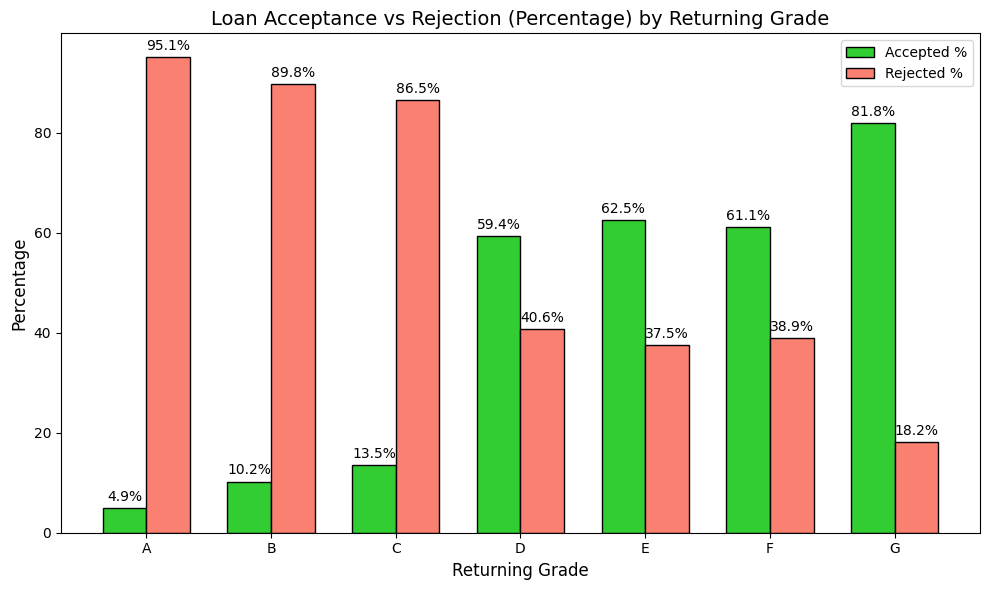

In [17]:
loan_accepted_by_returning_grade['accepted_percentage'] = (
    loan_accepted_by_returning_grade['accepted_loans'] / loan_accepted_by_returning_grade['total_loans_applied'] * 100
)
loan_accepted_by_returning_grade['rejected_percentage'] = 100 - loan_accepted_by_returning_grade['accepted_percentage']

# Positioning for side-by-side bars
categories = loan_accepted_by_returning_grade.index
x = np.arange(len(categories))  # Label positions
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting side-by-side bars
bar1 = ax.bar(x - width / 2, loan_accepted_by_returning_grade['accepted_percentage'], width, label='Accepted %', color='limegreen', edgecolor='black')
bar2 = ax.bar(x + width / 2, loan_accepted_by_returning_grade['rejected_percentage'], width, label='Rejected %', color='salmon', edgecolor='black')

# Adding percentage labels inside the bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Display percentage inside the bar
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Slight vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Formatting
ax.set_xlabel('Returning Grade', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Loan Acceptance vs Rejection (Percentage) by Returning Grade', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=360)
ax.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

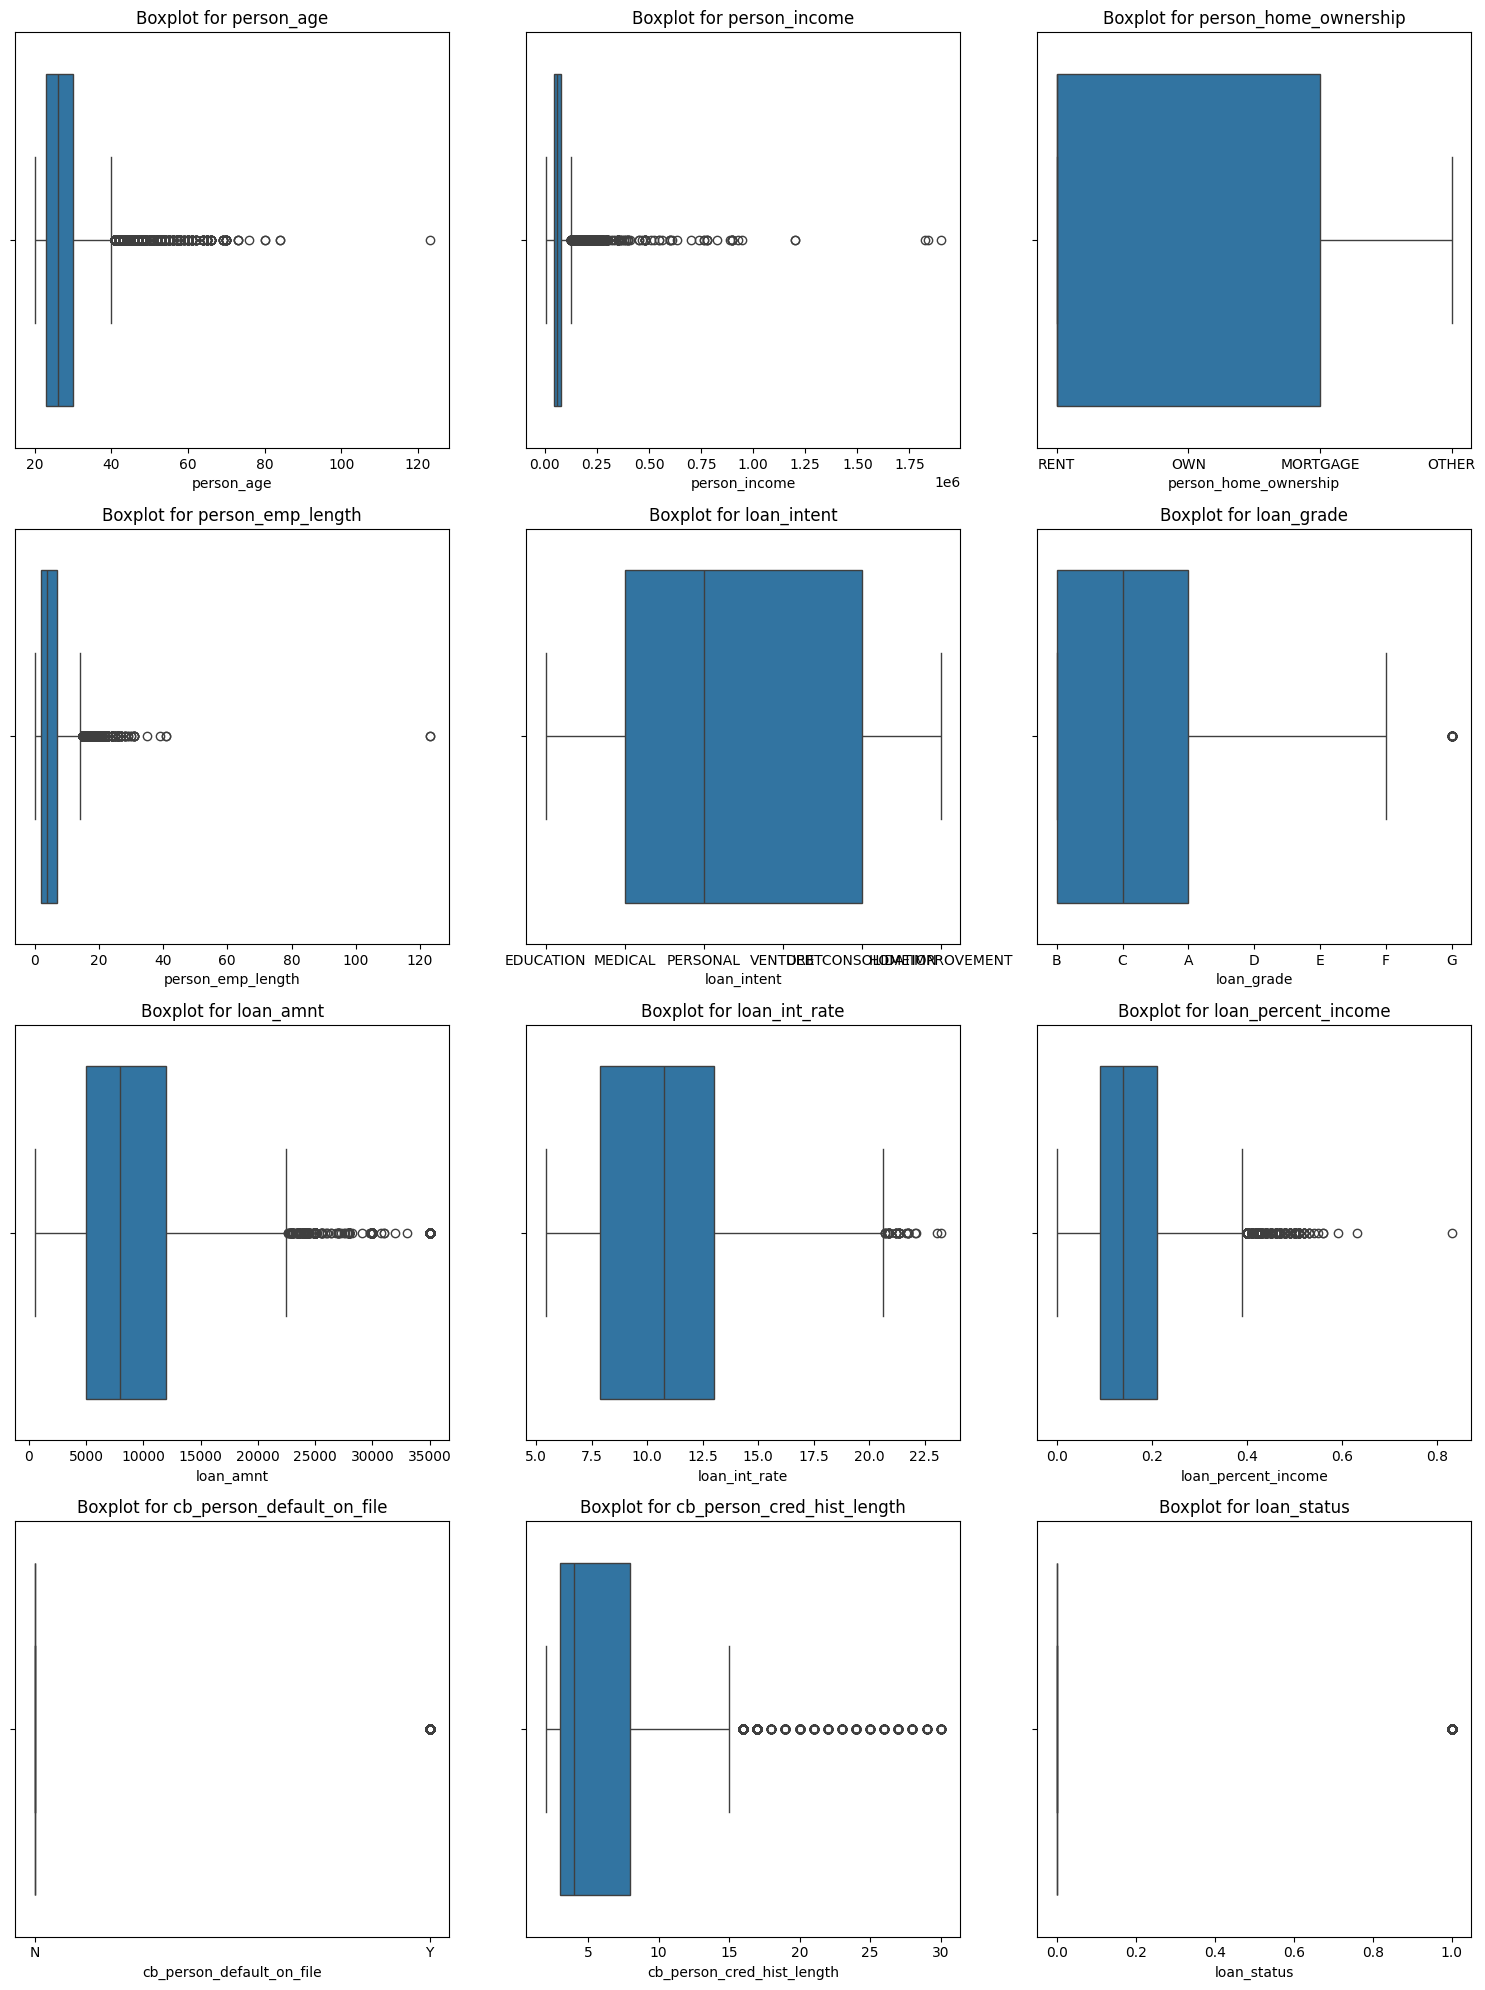

In [20]:
n_cols = 3  # Number of columns in the grid
n_rows = 4  # Calculate rows needed

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate boxplots for each numerical column
for i, col in enumerate(df):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()